In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pydot
import random
from keras.utils import plot_model
import os
from matplotlib.colors import ListedColormap


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
seed_value = 14
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = keras.Sequential([
    keras.layers.Dense(784, input_dim=784, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
image_size = x_train.shape[1]
train_data = x_train.reshape(x_train.shape[0], image_size * image_size)
test_data = x_test.reshape(x_test.shape[0], image_size * image_size)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255.0
test_data /= 255.0

In [7]:
num_classes = 10
train_labels_cat = keras.utils.to_categorical(y_train, num_classes)
test_labels_cat = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model.fit(train_data, train_labels_cat, epochs=3, batch_size=128)#, validation_data=(test_data, test_labels_cat))

Epoch 1/3
469/469 [==============================] - 4s 8ms/step - loss: 0.2509 - accuracy: 0.9274
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0964 - accuracy: 0.9715
Epoch 3/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0618 - accuracy: 0.9808


In [9]:
pred_data = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [10]:
error = [sum(pred_data[i] - test_labels_cat[i]) for i in range(len(test_labels_cat))]

In [11]:
mse = sum(error) / len(error)

In [12]:
print('me = ' + str(mse))
print('max error = ' + str(max(error)))

me = 3.4928574618469005e-09
max error = 2.1008402484312683e-07


In [13]:
points_x = [i % 28 for i in range(784)]
points_y = [i // 28 for i in range(784)][::-1]

1/1 [==============================] - 0s 17ms/step


8

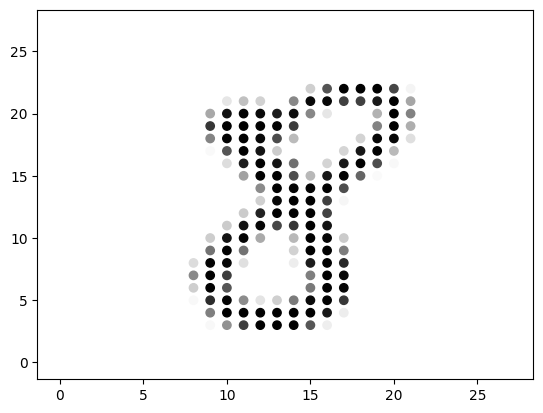

In [14]:
number = 134
predpred = model.predict(np.array([test_data[number]]))

colors = [str(o) for o in [1 - test_data[number] for i in range(len(test_data[number]))][0]]
plt.scatter(points_x, points_y, c=colors)
list(sum(predpred)).index(max(sum(predpred)))

In [16]:
img = keras.preprocessing.image.load_img('8.png', target_size=(28, 28), color_mode='grayscale')

In [17]:
img_arr = np.expand_dims(img, axis=0)
img_arr = 1 - img_arr / 255.0
img_arr = img_arr.reshape((1, 784))
result = model.predict([img_arr])
print(result)

1/1 [==============================] - 0s 39ms/step
[[8.5293896e-06 1.8654700e-05 5.0716173e-02 1.6215649e-01 1.6955414e-04
  1.6871587e-03 1.1899049e-03 1.3535571e-07 7.8405344e-01 6.4221704e-09]]


1/1 [==============================] - 0s 19ms/step


8

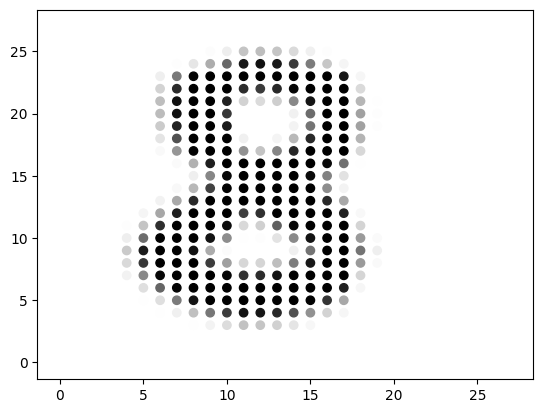

In [18]:
predpred = model.predict([img_arr])

colors = [str(o) for o in [1 - img_arr[0] for i in range(len(img_arr[0]))][0]]
plt.scatter(points_x, points_y, c=colors)
list(sum(predpred)).index(max(sum(predpred)))